# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Martinus Angger Budi Wicaksono
- **Email:** anggerbudi9@gmail.com
- **ID Dicoding:** martinus_angger

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh cuaca terhadap jumlah sewa sepeda?
- Pertanyaan 2 : Bagaimana pengaruh jenis hari (holiday, weekday, workingday) terhadap jumlah tertinggi sewa sepeda?
- Pertanyaan 3 : Bagaimana pengaruh musim terhadap jumlah sewa sepeda?
- Pertanyaan 4 : Pada bulan apa jumlah sewa sepeda berada pada titik tertinggi?
- Pertanyaan 5 : Pada jam berapa jumlah sewa sepeda berada pada titik tertinggi?

## Import Semua Packages/Library yang Digunakan

#### Cell ini bertujuan untuk mengimport semua packages/library yang akan digunakan dalam proyek ini. Packages/library yang digunakan antara lain:


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Pada tahap ini, cell berisikan kode yang bertujuan untuk membaca dataset hour dan menyimpannya kedalam dataframe bernama hour_dataset. Setelah itu, kita akan menampilkan 5 data teratas dari dataframe hour_dataset.

In [2]:
hour_dataset = pd.read_csv('data/hour.csv')
hour_dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Pada tahap ini, kita akan melakukan pengecekan terhadap dataset hour untuk mengetahui apakah terdapat missing data, data duplikat, dan juga melihat IQR dari dataset hour. Setelah itu, kita akan melakukan box plotting untuk mengetahui adanya outlier pada dataset hour.

In [3]:
hour_dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
print('Data duplikat pada dataset Hour: ', hour_dataset.duplicated().sum())

Data duplikat pada dataset Hour:  0


In [5]:
hour_dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


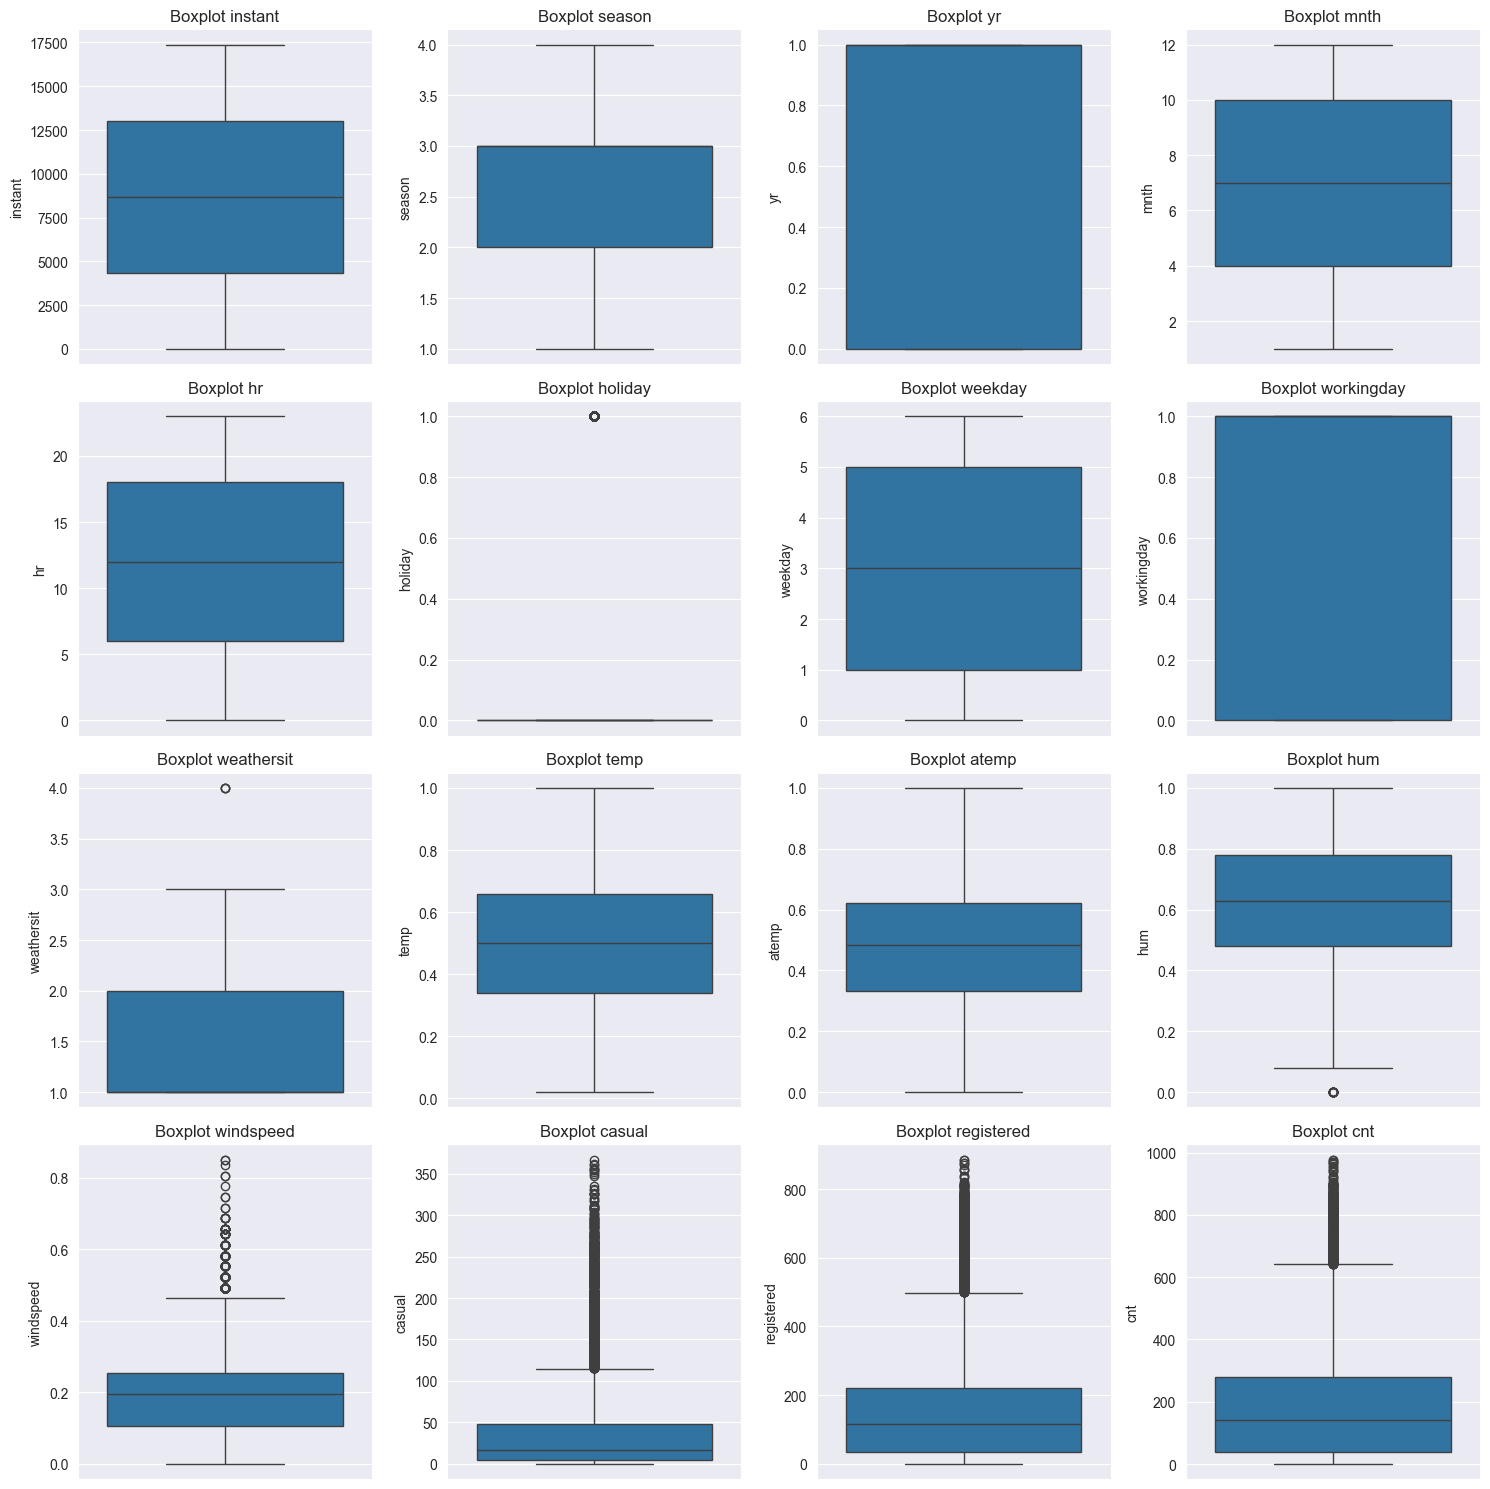

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
axes = axes.flatten()

columns_to_plot = hour_dataset.columns
columns_to_plot = columns_to_plot.drop('dteday')

for i, column in enumerate(columns_to_plot):
    sns.boxplot(hour_dataset[column], ax=axes[i])
    axes[i].set_title(f'Boxplot {column}')

plt.tight_layout()
plt.show()

#### Setelah melihat hasil boxplot diatas yang berisikan data dari semua kolom pada dataset hour, terdapat beberapa kolom yang memiliki outlier. Dari beberapa kolom diatas hampir semuanya merupakan outlier yang dianggap false positive kecuali kolom 'hum'. Maka dari itu tidak perlu dilakukan penghapusan outlier pada dataset hour.

### Cleaning Data

#### Pada tahap ini, kita akan melakukan cleaning data pada dataset hour. Cleaning data yang dilakukan hanya satu dan bersifat jaga-jaga karena pada tahap assessing data tidak ditemukan missing data. Cleaning data yang dilakukan adalah menghapus missing data pada dataset hour.

In [7]:
hour_dataset.dropna(axis=0, inplace=True)
hour_dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Exploratory Data Analysis (EDA)

#### Pada tahap ini, kita akan melakukan Exploratory Data Analysis (EDA) pada dataset hour. EDA yang dilakukan antara lain adalah melakukan cek korrelasi antar kolom.

In [8]:
dataset_copy = hour_dataset.copy()
dataset_copy = dataset_copy.drop('instant', axis=1)
dataset_copy = dataset_copy.drop('dteday', axis=1)
dataset_copy.corr()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929


#### Dari hasil korelasi diatas, tidak terdapat korelasi berarti yang dapat kita ambil kesimpulan. Maka dari itu kita akan melakukan visualisasi untuk mengetahui korelasi antar kolom pada dataset hour.

## Visualization & Explanatory Analysis

#### Pada tahap ini, kita akan melakukan visualisasi untuk menjawab pertanyaan bisnis yang telah ditentukan sebelumnya. Visualisasi yang dilakukan antara lain adalah:

In [9]:
dataset_2011 = hour_dataset[hour_dataset['yr'] == 0]
dataset_2012 = hour_dataset[hour_dataset['yr'] == 1]
dataset_both = hour_dataset

title_list = {'2011': ' 2011', '2012': ' 2012', 'both': ' 2011 dan 2012'}
dataset_list = {'2011': dataset_2011, '2012': dataset_2012, 'both': dataset_both}

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah sewa sepeda?

#### Pada tahap ini, kita akan melakukan visualisasi menggunakan bar chart untuk mengetahui pengaruh cuaca terhadap jumlah sewa sepeda pada tahun 2011, 2012, dan kedua tahun digabung.

In [10]:
def weather_plot(year):
    grouped_by_weather = dataset_list[year].groupby('weathersit')['cnt'].mean().reset_index()
    plt.figure(figsize=(10, 5))
    plt.bar(grouped_by_weather['weathersit'], grouped_by_weather['cnt'])
    plt.xlabel('Kondisi Cuaca')
    plt.xticks([1, 2, 3, 4])
    plt.ylabel('Rata-rata Jumlah Sewa Sepeda')
    plt.yticks(np.arange(0, 300, 50))
    plt.title('Pengaruh Cuaca Terhadap Jumlah Sewa Sepeda di Tahun' + title_list[year])
    plt.show()

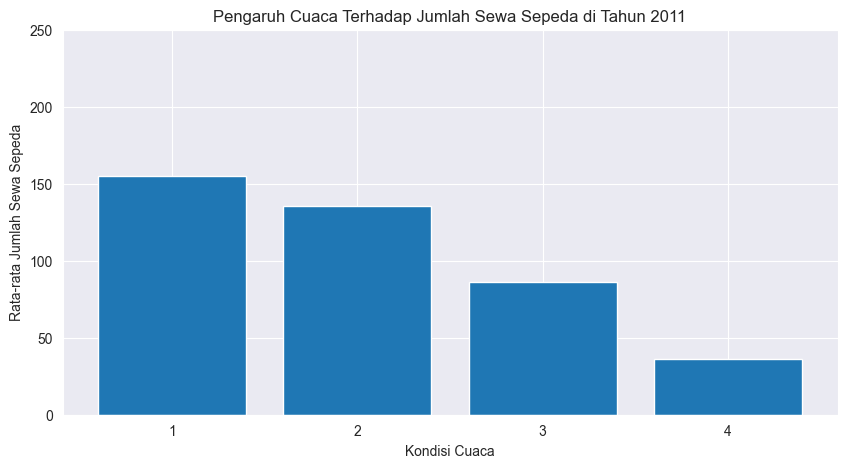

In [11]:
weather_plot('2011')

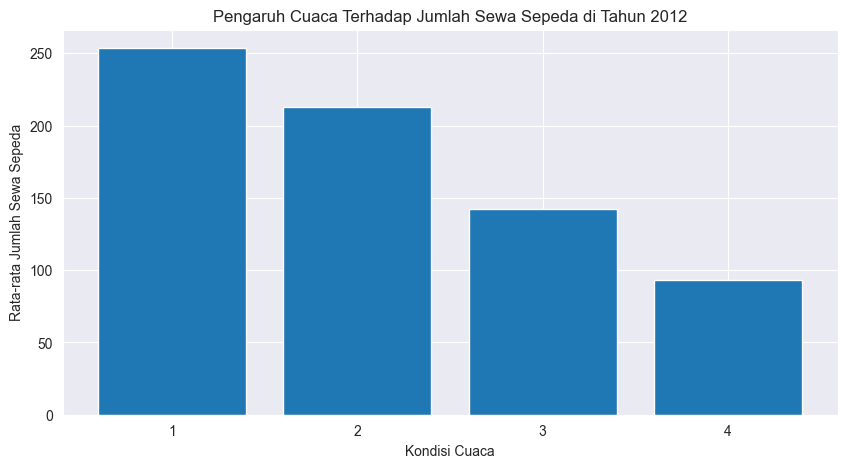

In [12]:
weather_plot('2012')

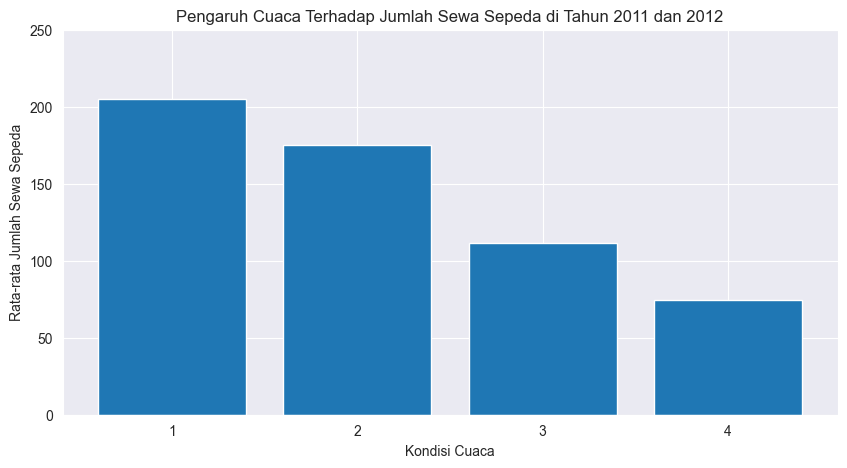

In [13]:
weather_plot('both')

## Legend

- 1 : Clear, Few clouds, Partly cloudy, Partly cloudy
- 2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

### Pertanyaan 2: Bagaimana pengaruh jenis hari (holiday, weekday, workingday) terhadap jumlah tertinggi sewa sepeda?

#### Pada tahap ini, kita akan melakukan visualisasi menggunakan bar chart untuk mengetahui pengaruh jenis hari terhadap jumlah tertinggi sewa sepeda pada tahun 2011, 2012, dan kedua tahun digabung.

In [14]:
def day_type_plot(year):
    grouped_by_day_type = dataset_list[year].groupby(['workingday', 'weekday'])['cnt'].mean().reset_index()
    plt.figure(figsize=(15, 10))
    bar = sns.barplot(data=grouped_by_day_type, x='weekday', y='cnt', hue='workingday')

    weekday_type = {0: 'Akhir Pekan / Hari Libur', 1: 'Hari Kerja'}
    new_labels = [weekday_type[value] for value in grouped_by_day_type['workingday'].unique()]
    new_handles = bar.get_legend_handles_labels()[0]

    plt.legend(title='Jenis Hari', labels=new_labels, handles=new_handles)
    plt.xlabel('Hari')
    plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
    plt.ylabel('Rata-rata Jumlah Sewa Sepeda')
    plt.yticks(np.arange(0, 350, 25))
    plt.title('Pengaruh Jenis Hari Terhadap Jumlah Sewa Sepeda di Tahun' + title_list[year])
    plt.show()

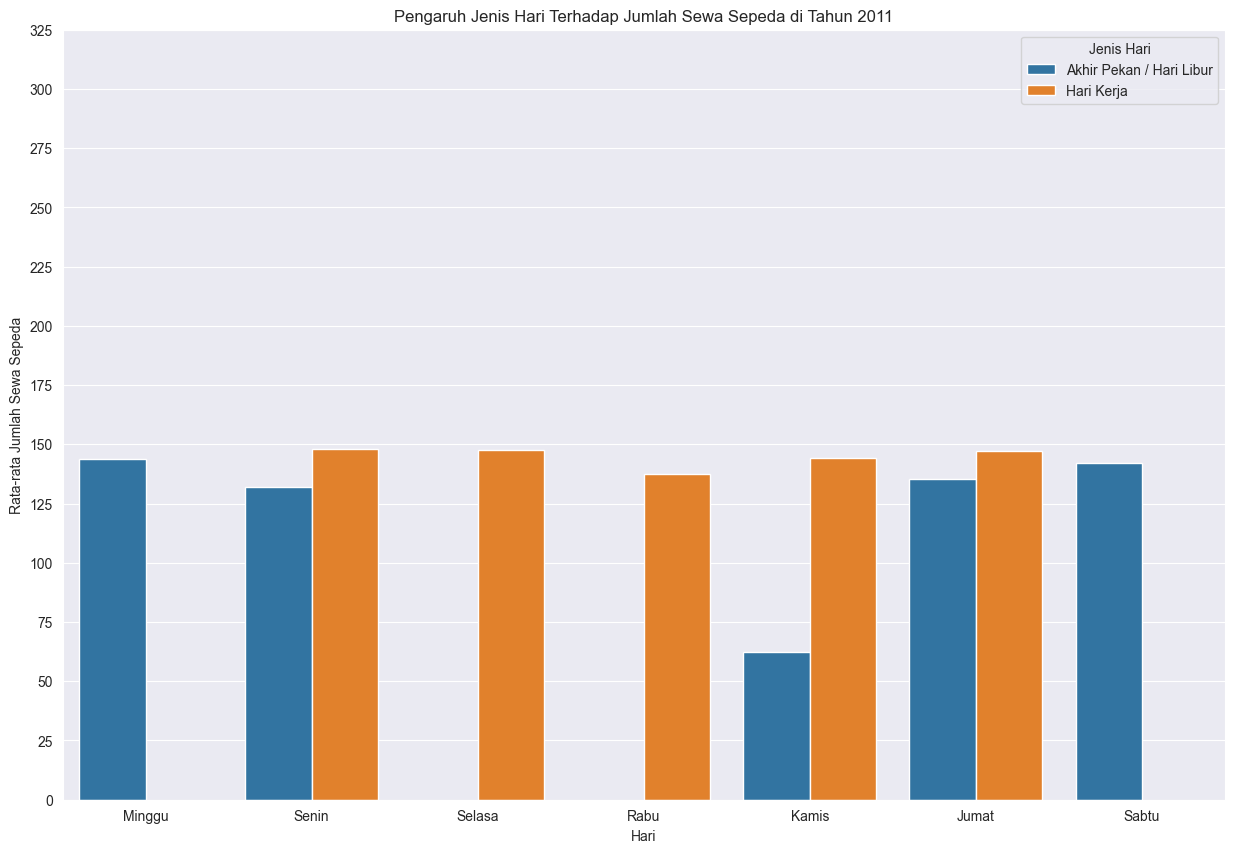

In [15]:
day_type_plot('2011')

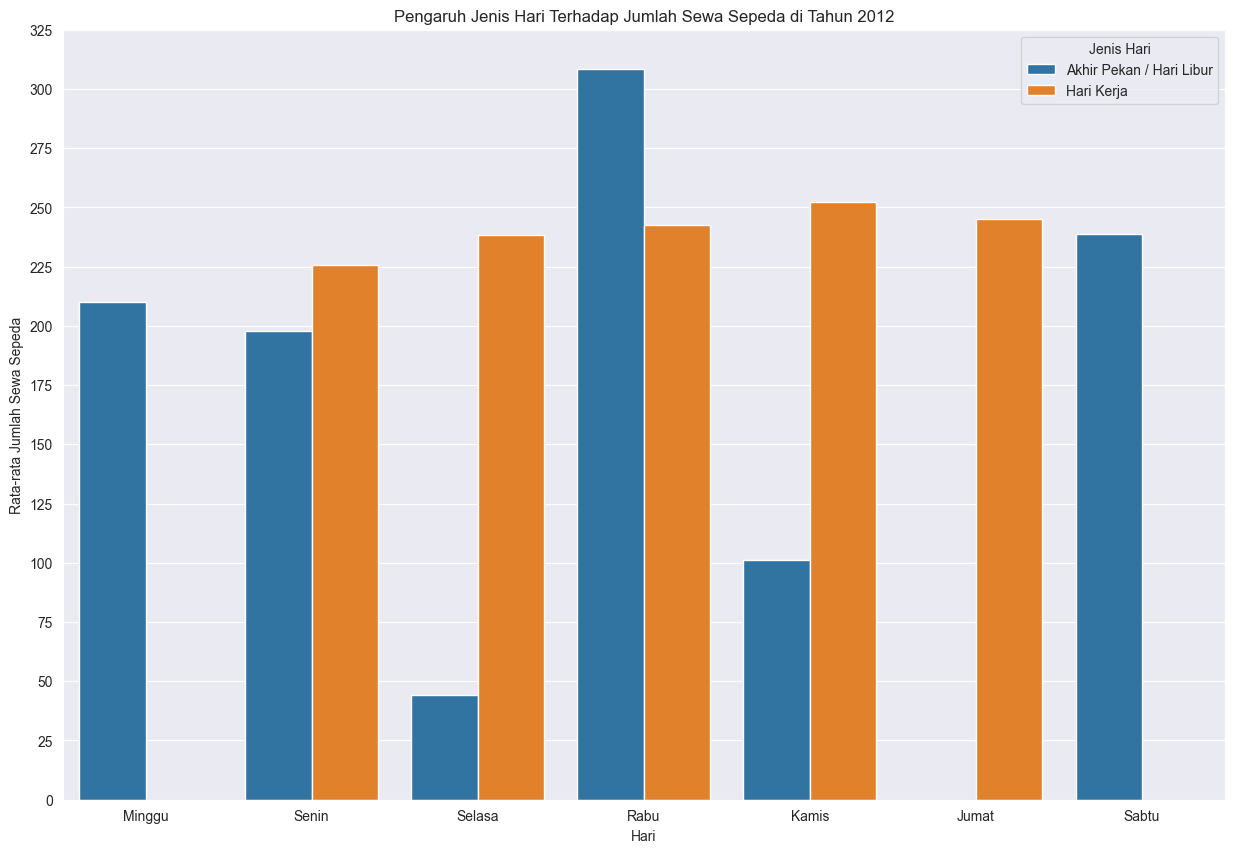

In [16]:
day_type_plot('2012')

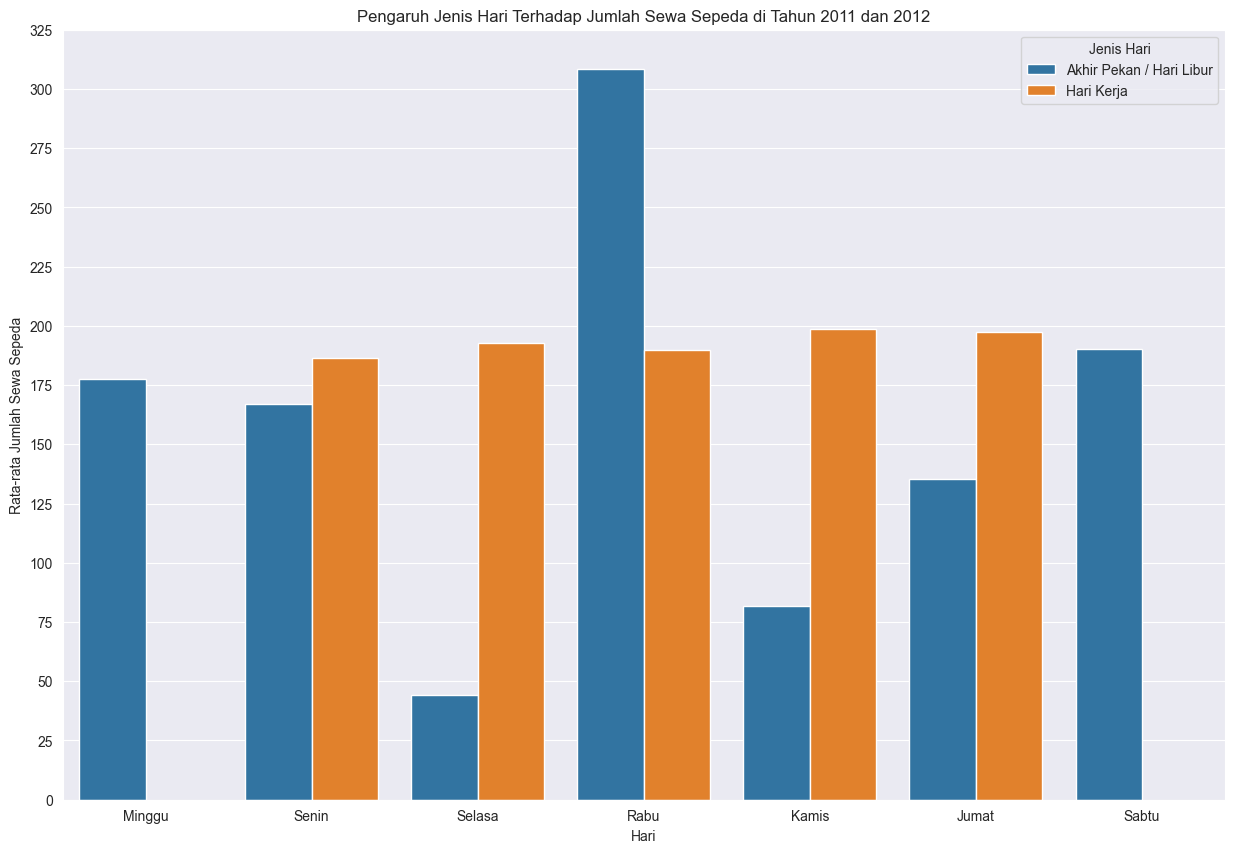

In [17]:
day_type_plot('both')

### Pertanyaan 3: Bagaimana pengaruh musim terhadap jumlah sewa sepeda?

#### Pada tahap ini, kita akan melakukan visualisasi menggunakan pie chart untuk mengetahui pengaruh musim terhadap jumlah sewa sepeda pada tahun 2011, 2012, dan kedua tahun digabung.

In [18]:
def season_plot(year):
    grouped_by_season = dataset_list[year].groupby('season')['cnt'].mean().reset_index()
    plt.figure(figsize=(8, 8))
    plt.pie(grouped_by_season['cnt'], labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'],
            autopct='%1.1f%%', startangle=90, counterclock=False, colors=['#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
    plt.title('Pengaruh Musim Terhadap Rata-Rata Sewa Sepeda di Tahun' + title_list[year])
    plt.show()

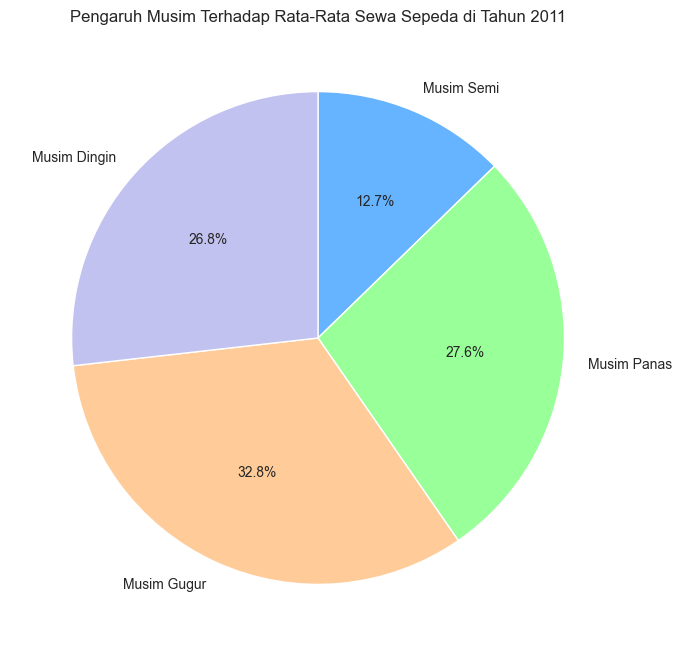

In [19]:
season_plot('2011')

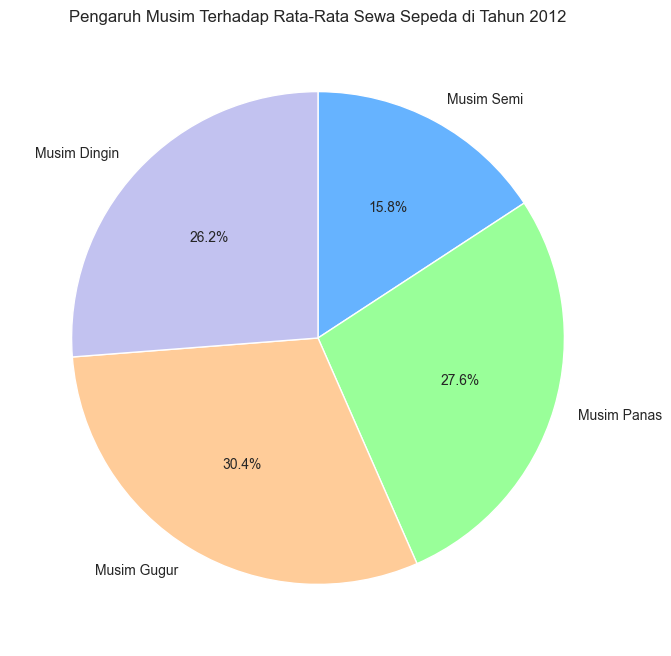

In [20]:
season_plot('2012')

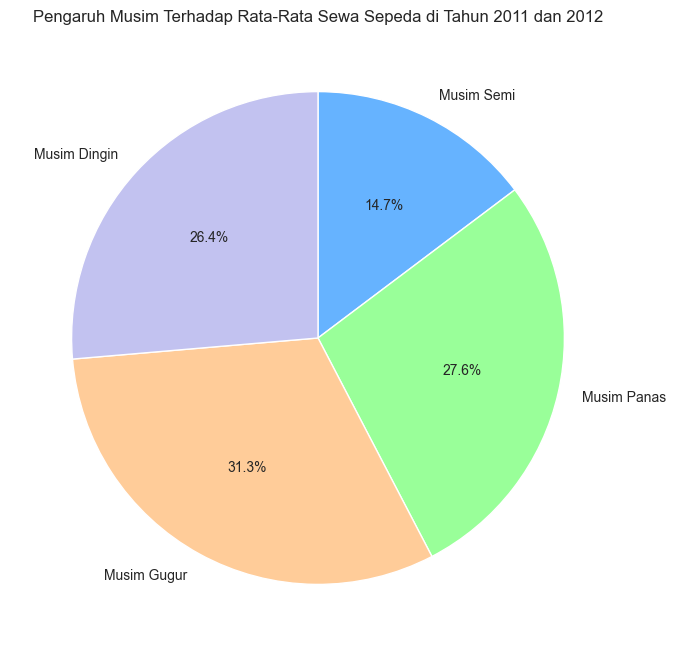

In [21]:
season_plot('both')

### Pertanyaan 4: Pada bulan apa jumlah sewa sepeda berada pada titik tertinggi?

#### Pada tahap ini, kita akan melakukan visualisasi menggunakan line chart untuk mengetahui pada bulan apa jumlah sewa sepeda berada pada titik tertinggi pada tahun 2011, 2012, dan kedua tahun digabung.

In [22]:
color_list = {'2011': 'b', '2012': 'g', 'both': 'y'}

def trend_plot(year):
    grouped_by_trend = dataset_list[year].groupby('mnth')['cnt'].mean().reset_index()
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=grouped_by_trend, x='mnth', y='cnt', marker='o', color=color_list[year])
    plt.xlabel('Bulan')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.ylabel('Rata-rata Sewa Sepeda')
    plt.yticks(np.arange(0, 350, 25))
    plt.title('Rata-rata Sewa Sepeda Setiap Bulan di Tahun' + title_list[year])
    plt.show()

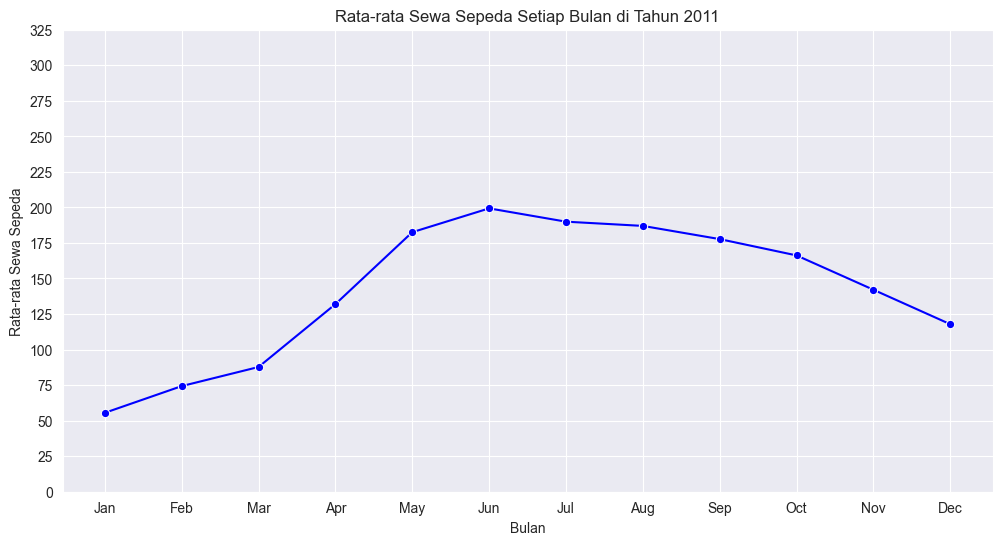

In [23]:
trend_plot('2011')

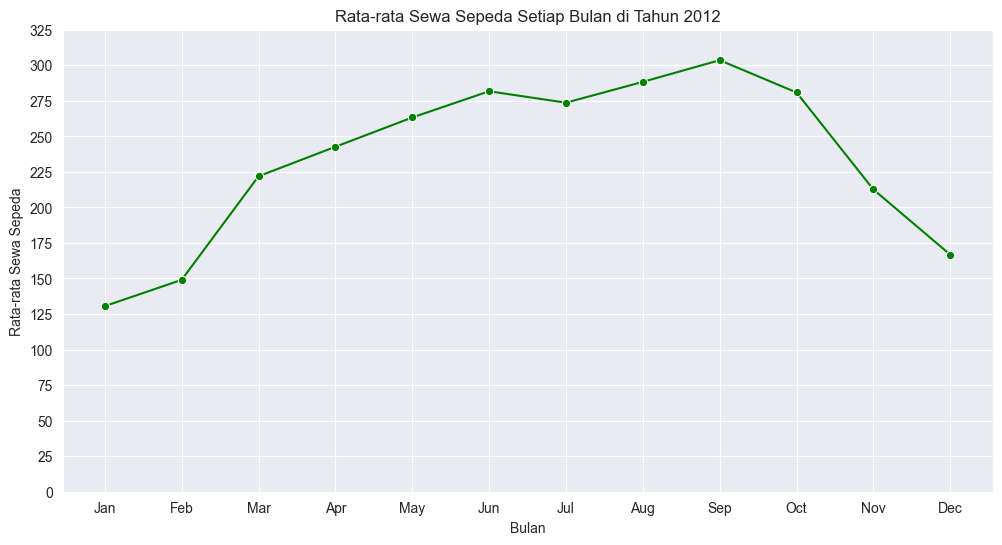

In [24]:
trend_plot('2012')

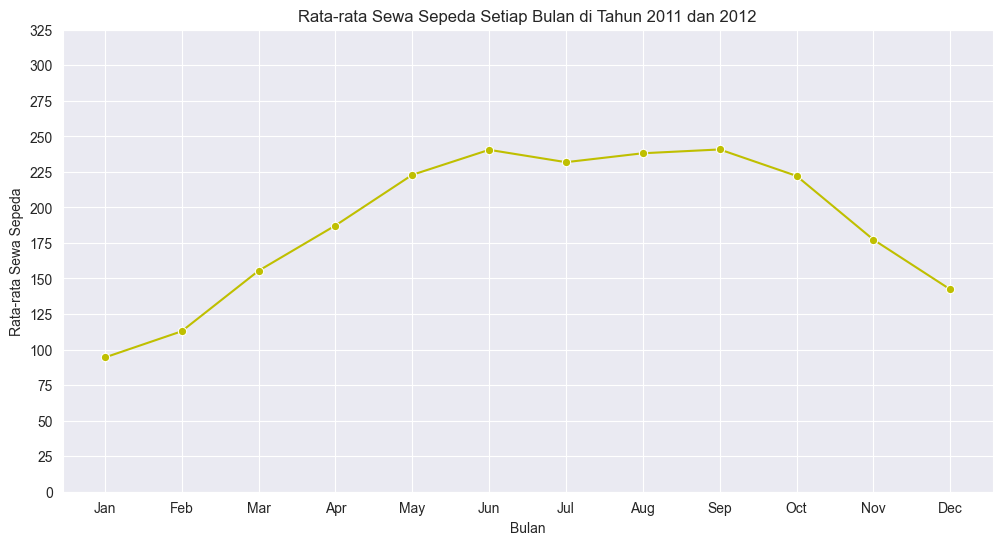

In [25]:
trend_plot('both')

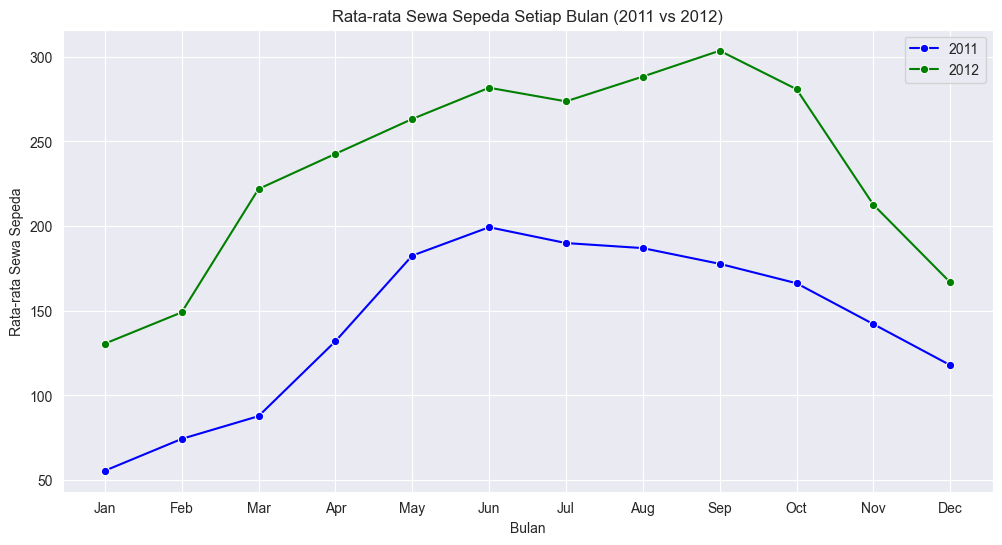

In [26]:
grouped_by_trend_2011 = dataset_2011.groupby('mnth')['cnt'].mean().reset_index()
grouped_by_trend_2012 = dataset_2012.groupby('mnth')['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_by_trend_2011, x='mnth', y='cnt', marker='o', label='2011', color='b')
sns.lineplot(data=grouped_by_trend_2012, x='mnth', y='cnt', marker='o', label='2012', color='g')

plt.xlabel('Bulan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Rata-rata Sewa Sepeda')
plt.title('Rata-rata Sewa Sepeda Setiap Bulan (2011 vs 2012)')
plt.legend()

plt.show()

### Pertanyaan 5: Pada jam berapa jumlah sewa sepeda mengalami peningkatan tertinggi?

In [27]:
def hour_plot(year):
    grouped_by_hour = dataset_list[year].groupby('hr')['cnt'].mean().reset_index()
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=grouped_by_hour, x='hr', y='cnt', marker='o', color=color_list[year])
    plt.xlabel('Jam')
    plt.xticks(range(0, 24))
    plt.ylabel('Rata-rata Sewa Sepeda')
    plt.yticks(np.arange(0, 700, 100))
    plt.title('Rata-rata Sewa Sepeda Setiap Jam di Tahun' + title_list[year])
    plt.show()

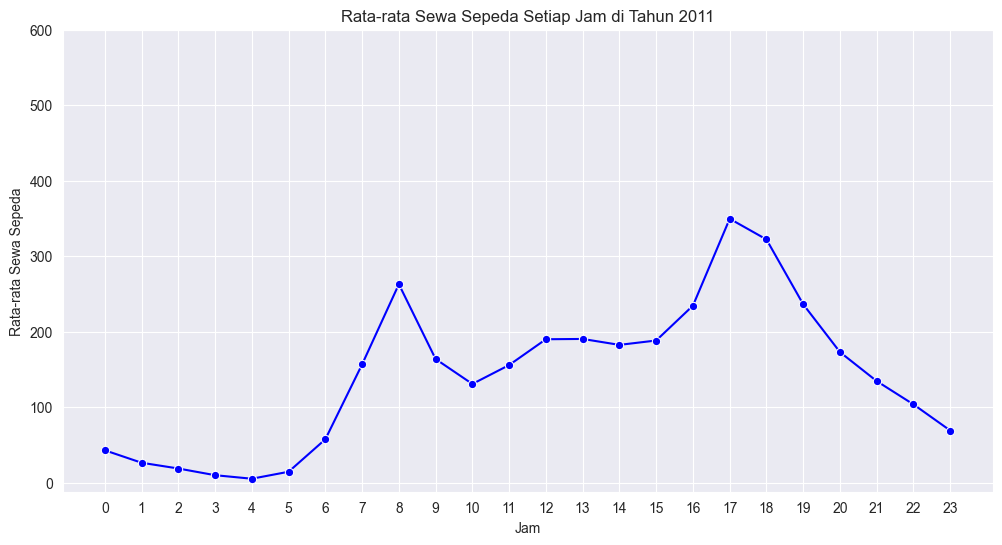

In [28]:
hour_plot('2011')

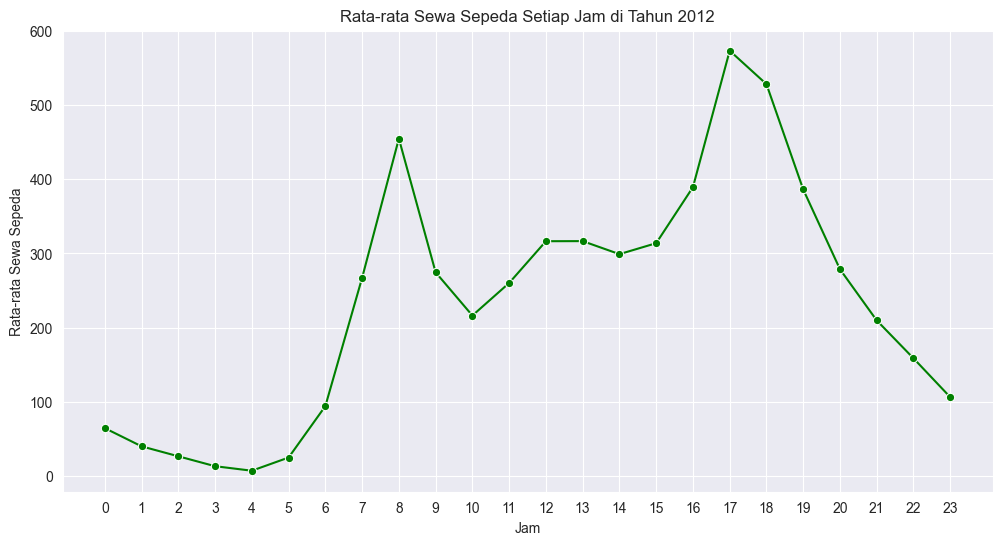

In [29]:
hour_plot('2012')

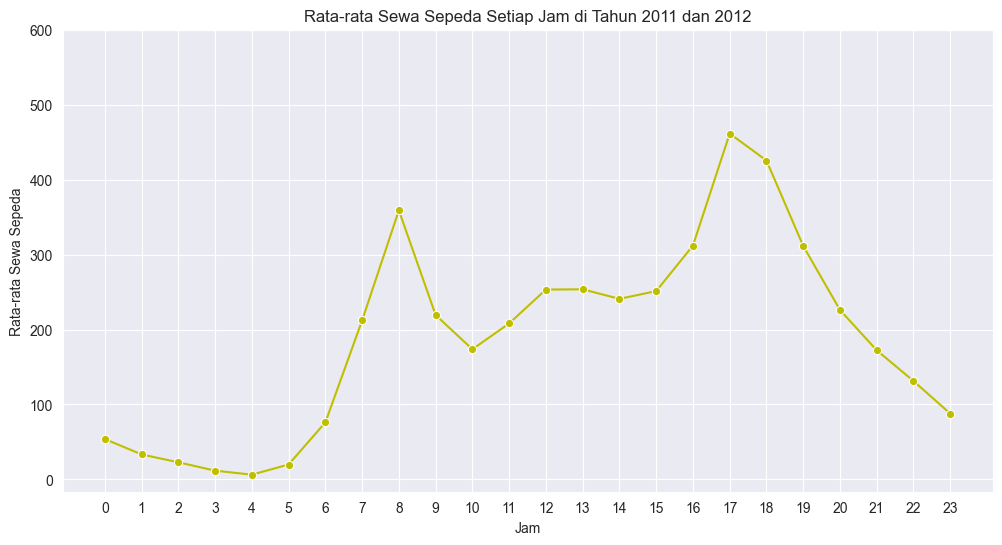

In [30]:
hour_plot('both')

## Conclusion

- Conclution pertanyaan 1 :
    - Pada tahun 2011 dan 2012, rata-rata jumlah sewa sepeda tertinggi terjadi pada kondisi cuaca 1 (cerah) dan rata-rata jumlah sewa sepeda terendah terjadi pada kondisi cuaca 4 (cuaca sangat buruk).

- Conclution pertanyaan 2 :
    - Pada tahun 2011 :.
        - Rata-rata jumlah sewa sepeda tertinggi pada hari kerja terjadi pada hari Senin. Sedangkan rata-rata tertinggi pada akhir pekan / hari libur terjadi pada hari Minggu.
        - Rata-rata jumlah sewa sepeda terendah pada hari kerja terjadi pada hari Rabu. Sedangkan rata-rata terendah pada akhir pekan / hari libur terjadi pada hari Kamis.
    - Pada tahun 2012 :
        - Rata-rata jumlah sewa sepeda tertinggi pada hari kerja terjadi pada hari Kamis. Sedangkan rata-rata tertinggi pada akhir pekan / hari libur terjadi pada hari Rabu.
        - Rata-rata jumlah sewa sepeda terendah pada hari kerja terjadi pada hari Senin. Sedangkan rata-rata terendah pada akhir pekan / hari libur terjadi pada hari Selasa.
    - Pada tahun 2011 dan 2012 (digabung):
        - Rata-rata jumlah sewa sepeda tertinggi pada hari kerja terjadi pada hari Kamis. Sedangkan rata-rata tertinggi pada akhir pekan / hari libur terjadi pada hari Rabu.
        - Rata-rata jumlah sewa sepeda terendah pada hari kerja terjadi pada hari Senin. Sedangkan rata-rata terendah pada akhir pekan / hari libur terjadi pada hari Selasa.

- Conclution pertanyaan 3 :
    - Pada tahun 2011, 2012, dan kedua tahun Peringkat rata-rata sewa sepeda berdasarkan musim adalah sebagai berikut:
        - Musim Gugur
        - Musim Panas
        - Musim Dingin
        - Musim Semi

- Conclution pertanyaan 4 :
    - Pada tahun 2011, rata-rata jumlah sewa sepeda berada pada titik tertinggi pada bulan Juni dan berada pada titik terendah pada bulan Januari.
    - Pada tahun 2012, rata-rata jumlah sewa sepeda berada pada titik tertinggi pada bulan September dan berada pada titik terendah pada bulan Januari.
    - Pada kedua tahun (digabung), rata-rata jumlah sewa sepeda berada pada titik tertinggi pada bulan September dan berada pada titik terendah pada bulan Januari.

- Conclution pertanyaan 5 :
    - Pada plot 2011, 2012, dan gabungan, rata-rata jumlah sewa sepeda berada pada titik tertinggi pada jam 5 sore (17.00) lalu diikuti jam 8 pagi (08.00) dan berada pada titik terendah pada jam 4 pagi (04.00).